Library import 

In [2]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#this will be usefull to remove outlier easily 
from scipy import stats

Downloading the dataset 

In [3]:
# first dataset containing the original videos 
df_youtube_videos=pd.read_csv("youtube_videos.tsv",sep="\t")

#second dataset containing a subset of video with input/ouput characteristics and mesured time encoding 
# df_transcoding_mesurment=pd.read_csv("transcoding_mesurment.tsv",sep="\t")



1st dataset inspections 

In [4]:
display(df_youtube_videos.head(5))
display(df_youtube_videos.describe())

,id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url
0,uDNj-_5ty48,267,373,274,568,320,29.97,0.00,h264,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
1,uDNj-_5ty48,267,512,396,480,270,29.97,29.97,h264,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
2,uDNj-_5ty48,267,324,263,400,226,29.97,29.97,flv1,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
3,uDNj-_5ty48,267,85,55,176,144,12.00,12.00,mpeg4,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
4,WCgt-AactyY,31,1261,1183,640,480,24.00,0.00,h264,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...


,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.)
count,168286.000000,168286.00000,168286.000000,168286.000000,168286.000000,168286.000000,168286.000000
mean,271.654184,730.62149,624.363025,561.018706,368.399701,24.564592,19.884441
std,552.881871,919.15473,860.955654,359.071569,201.274180,7.396615,11.435070
min,1.000000,0.00000,0.000000,100.000000,88.000000,0.000000,0.000000
25%,55.000000,289.00000,231.000000,320.000000,240.000000,23.980000,12.000000
50%,145.000000,459.00000,349.000000,480.000000,360.000000,29.920000,25.000000
75%,289.000000,826.00000,640.000000,640.000000,480.000000,29.970000,29.970000
max,25845.000000,22421.00000,22229.000000,2592.000000,1944.000000,59.940000,30.020000


we can get a first estimate of what the data look like using these method now 

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

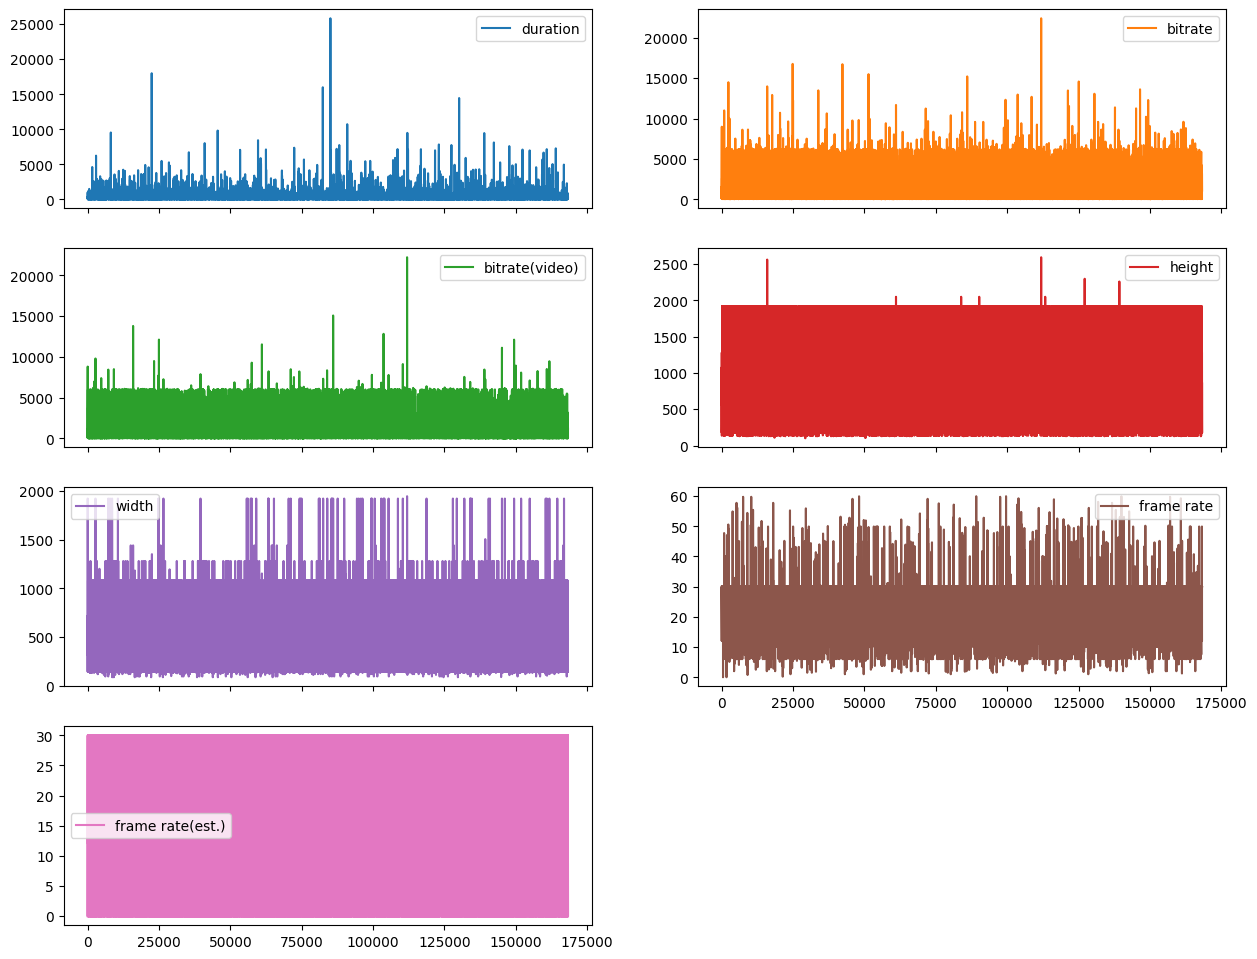

In [5]:
df_youtube_videos.plot(subplots=True, layout=(5,2) ,figsize=(15, 15))

using these plot we don't get that much infomation other than the avergae value and repartion of the data in the dataset however this representation make it easy to 
identify the outliers which can be high in certains cases 

array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'bitrate'}>,
        <AxesSubplot:title={'center':'bitrate(video)'}>],
       [<AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'frame rate'}>],
       [<AxesSubplot:title={'center':'frame rate(est.)'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

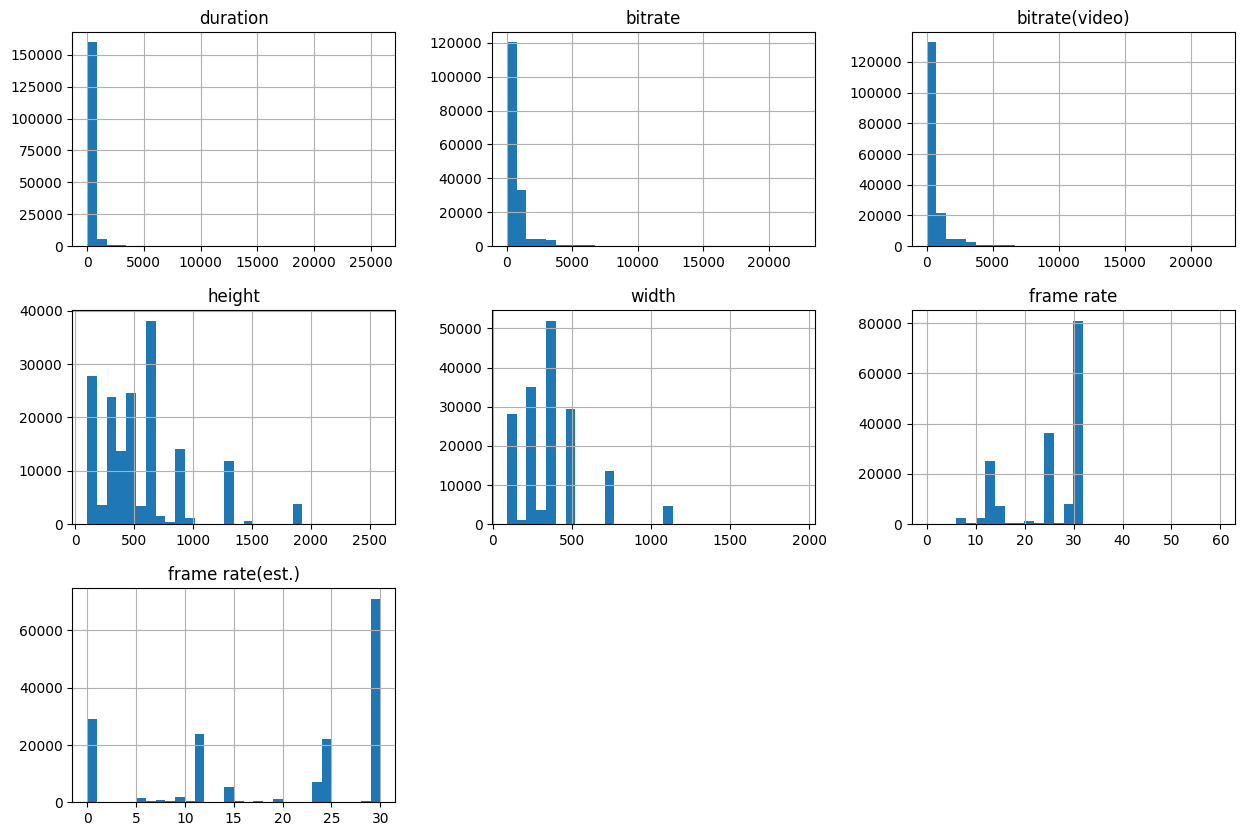

In [6]:
df_youtube_videos.hist(bins=30, figsize=(15, 10))

we will try to plot some of the data without their outlier especialy the columns duration , bitrate and duration
might take some time 

,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.)
count,160655.000000,160655.000000,160655.000000,160655.000000,160655.000000,160655.000000,160655.000000
mean,226.445613,623.962398,524.301124,525.432175,345.806368,24.417496,19.642410
std,265.905352,609.877737,575.631484,293.740390,156.856294,7.398340,11.490512
min,1.000000,0.000000,0.000000,100.000000,88.000000,2.420000,0.000000
25%,54.000000,280.000000,223.000000,320.000000,240.000000,20.000000,12.000000
50%,142.000000,443.000000,337.000000,480.000000,360.000000,29.920000,25.000000
75%,282.000000,781.000000,631.000000,640.000000,480.000000,29.970000,29.970000
max,1925.000000,3486.000000,3194.000000,1280.000000,720.000000,46.330000,30.020000


array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'bitrate'}>,
        <AxesSubplot:title={'center':'bitrate(video)'}>],
       [<AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'frame rate'}>],
       [<AxesSubplot:title={'center':'frame rate(est.)'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

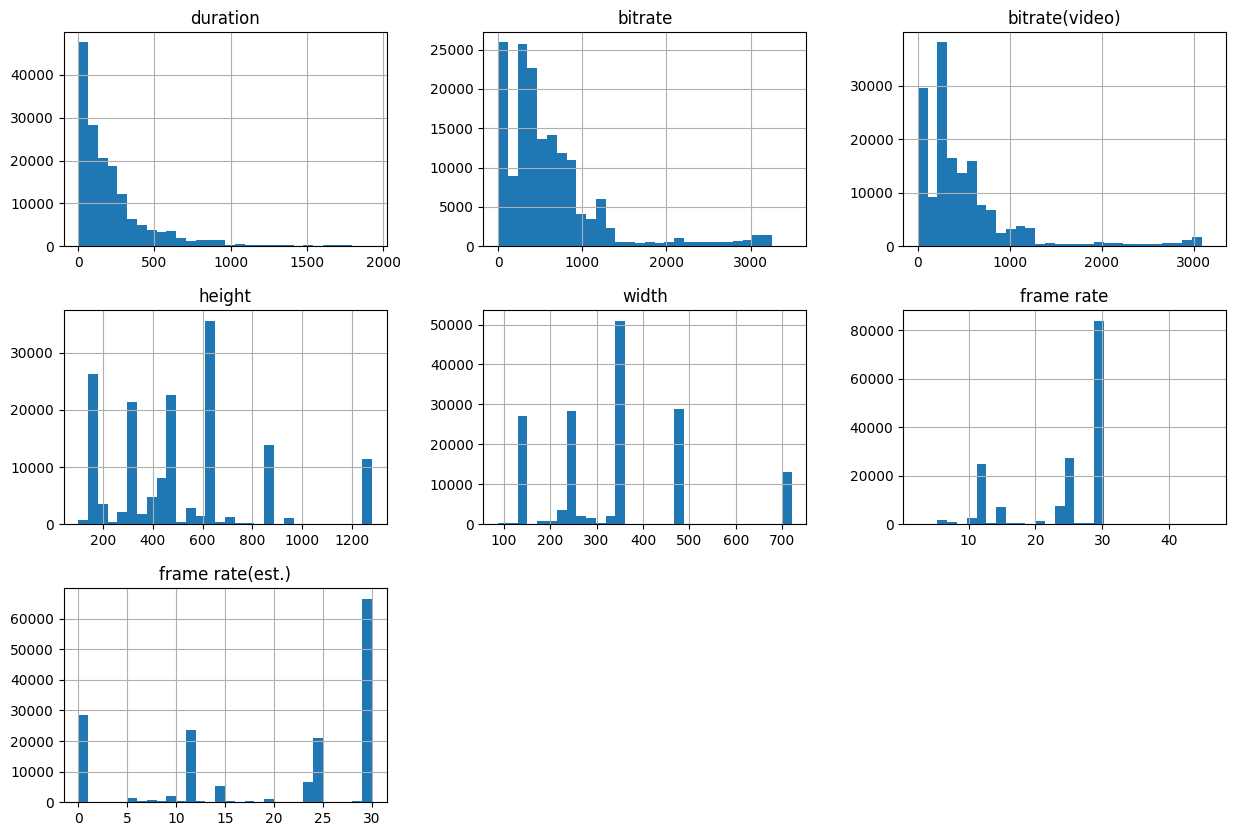

In [15]:
youtube_numeric = df_youtube_videos.drop(columns=['id','codec','category','url'])
# youtube_numeric
clean_youtube = youtube_numeric[(np.abs(stats.zscore(youtube_numeric)) < 3).all(axis=1)]
display(clean_youtube.describe())
clean_youtube.hist(bins=30, figsize=(15, 10))


we can also get insight in the type of codec for encoding the data accross the dataset 

In [16]:
df_categorie=pd.DataFrame(df_youtube_videos,columns=['codec'])
temp=df_youtube_videos.groupby('codec').size()

fig=px.bar(temp,
           x=temp.index,
           y=temp, 
           range_x = [0,6],color=temp.index,
           title="Number of Video per type of codec")

fig.update_layout(xaxis_title="codec", yaxis_title="Number of Video", 
                      yaxis_categoryorder = 'total ascending',
                      uniformtext_minsize=20, uniformtext_mode='hide')

In [17]:
df_youtube_videos.groupby(['codec']).count()

,id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),category,url
codec,,,,,,,,,,
flv1,25337,25337,25337,25337,25337,25337,25337,25337,25337,25337
h264,74996,74996,74996,74996,74996,74996,74996,74996,74996,74996
mpeg4,25264,25264,25264,25264,25264,25264,25264,25264,25264,25264
none,2,2,2,2,2,2,2,2,2,2
vp8,42687,42687,42687,42687,42687,42687,42687,42687,42687,42687
